In [ ]:
#step 3 of Project 1 Grace and Alexander

### Algorithm Exploration
we explored 4 possible algorithms that we can use for our data set Income, sgdClassifier, Linear SVC, KNeighbors Classifier, and Decision Tree Classifier.

We evaluated the accuracy score, precision score, recall score and f1 score to determine what algorithms fits best with our data set. Ultimately the two best alogirthms are decision tree classifer, and logistic regression.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder


In [3]:
#load data
data = pd.read_csv('adult.csv')

In [4]:
# Encode categorical features (example: 'workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country')
categorical_columns = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

# Define the target variable and features
X = data.drop('income', axis=1)
y = data['income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
sgdClassifier = SGDClassifier(loss='log_loss', verbose=3, random_state=42)

# Fit the model on the training data
sgdClassifier.fit(X_train, y_train)

# Make predictions on the test data
sgd_pred = sgdClassifier.predict(X_test)

# Evaluate the model
sgdAcc = accuracy_score(y_test, sgd_pred)
sgdPrecision = precision_score(y_test, sgd_pred, average = 'macro')
sgdRecall = recall_score(y_test, sgd_pred, average= 'macro')
sgdF1 = f1_score(y_test, sgd_pred, average = 'macro')


-- Epoch 1
Norm: 1060922.70, NNZs: 14, Bias: -209.793974, T: 26048, Avg. loss: 9790299039.688606
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 691308.03, NNZs: 14, Bias: -268.523652, T: 52096, Avg. loss: 1960725764.092586
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 525592.48, NNZs: 14, Bias: -289.212773, T: 78144, Avg. loss: 1167469783.195579
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 414976.97, NNZs: 14, Bias: -306.191258, T: 104192, Avg. loss: 815789081.202027
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 365961.72, NNZs: 14, Bias: -317.714388, T: 130240, Avg. loss: 647322212.750247
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 328322.91, NNZs: 14, Bias: -328.732193, T: 156288, Avg. loss: 522817817.562430
Total training time: 0.04 seconds.
-- Epoch 7
Norm: 294564.01, NNZs: 14, Bias: -342.842508, T: 182336, Avg. loss: 441095633.032112
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 270356.24, NNZs: 14, Bias: -353.653632, T: 208384, Avg. loss: 386

In [ ]:
# Create an instance of LinearSVC
svcClassifier = LinearSVC(dual='auto', max_iter=2000, random_state=42)

# Fit the model on the training data
svcClassifier.fit(X_train, y_train)

# Make predictions on the development (dev) data
svc_dev_pred = svcClassifier.predict(X_test)

# Evaluate the model
svcAcc = accuracy_score(y_test, svc_dev_pred)
svcPrecision = precision_score(y_test, svc_dev_pred, average='macro')
svcRecall = recall_score(y_test, svc_dev_pred, average='macro')
svcF1 = f1_score(y_test, svc_dev_pred, average='macro')

In [ ]:
# Create an instance of KNeighborsClassifier
knnClassifier = KNeighborsClassifier()

# Fit the model on the training data
knnClassifier.fit(X_train, y_train)

# Make predictions on the development (dev) data
knn_dev_pred = knnClassifier.predict(X_test)

# Evaluate the model using the development (dev) data
knnAcc = accuracy_score(y_test, knn_dev_pred)
knnPrecision = precision_score(y_test, knn_dev_pred, average='macro')
knnRecall = recall_score(y_test, knn_dev_pred, average='macro')
knnF1 = f1_score(y_test, knn_dev_pred, average='macro')

In [ ]:
#---LogisticRegression (4)
lrClassifier = LogisticRegression(max_iter  = 5000)
lrClassifier.fit(X_train, y_train)
lr_dev_pred = lrClassifier.predict(X_test)

lrAcc = accuracy_score(y_test, lr_dev_pred)
lrPrecision = precision_score(y_test, lr_dev_pred, average='macro')
lrRecall = recall_score(y_test, lr_dev_pred, average='macro')
lrF1 = f1_score(y_test, lr_dev_pred, average='macro')


In [ ]:
#---DecisionTreeClassifier (5)
dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, y_train)
dt_dev_pred = dtClassifier.predict(X_test)

dtAcc = accuracy_score(y_test, dt_dev_pred)
dtPrecision = precision_score(y_test, dt_dev_pred, average='macro')
dtRecall = recall_score(y_test, dt_dev_pred, average='macro')
dtF1 = f1_score(y_test, dt_dev_pred, average='macro')


In [ ]:
dfscore = pd.DataFrame({"acc": [sgdAcc, svcAcc, knnAcc, lrAcc, dtAcc],
                       "precision": [sgdPrecision, svcPrecision, knnPrecision, lrPrecision, dtPrecision],
                       "recall": [sgdRecall, svcRecall, knnRecall, lrRecall, dtRecall],
                       "f1": [sgdF1, svcF1, knnF1, lrF1, dtF1]},
                      index = ["SGDClassifier", "LinearSVC", "KNeighborsClassifier", "LogisticRegression", "DecisionTree"])
dfscore

,acc,precision,recall,f1
SGDClassifier,0.787963,0.800714,0.561090,0.551738
LinearSVC,0.804852,0.782882,0.614860,0.632829
KNeighborsClassifier,0.778290,0.683282,0.615238,0.629544
LogisticRegression,0.804698,0.740072,0.654554,0.676190
DecisionTree,0.810379,0.737531,0.743931,0.740600


CPU times: user 12min 50s, sys: 736 ms, total: 12min 50s
Wall time: 1min 27s


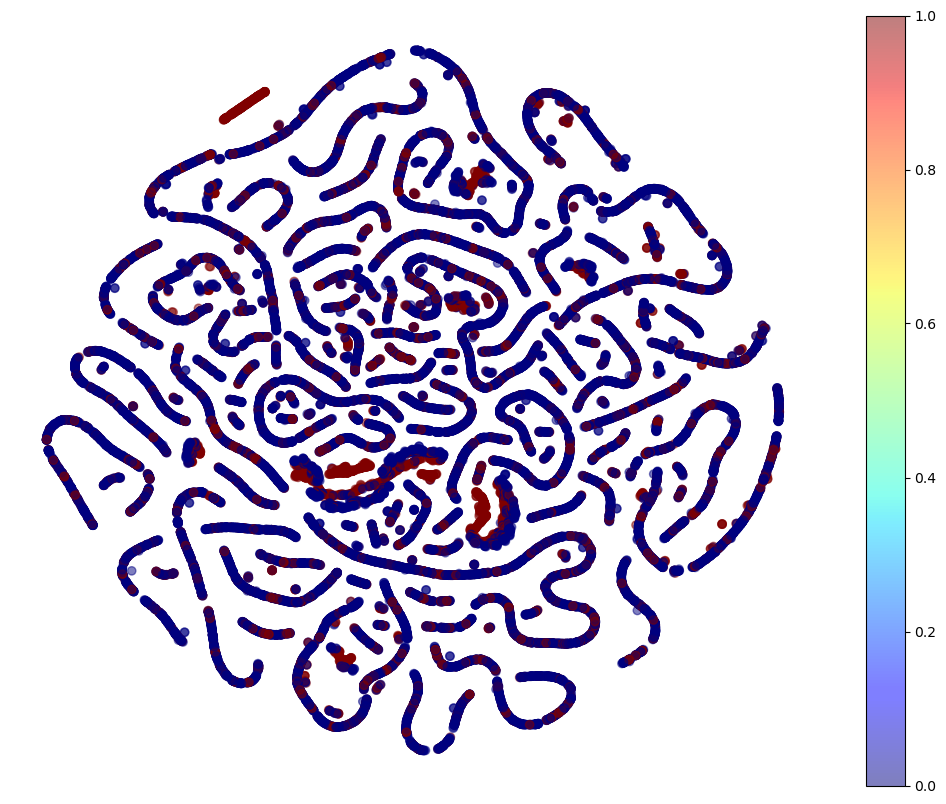

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train = X[:32561], y[:32561]
y_train = y_train.map({'<=50K': 0, '>50K': 1})

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_train)

plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_train.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()